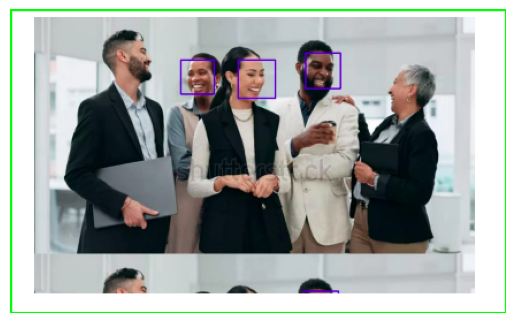

In [ ]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to initialize the list of trackers (for older versions of OpenCV)
def initialize_trackers():
    trackers = []  # List to hold trackers for each object
    return trackers

# Function to add individual trackers for each object
def add_tracker(trackers, frame, bbox):
    tracker = cv2.TrackerKCF_create()  # Create a KCF tracker (you can choose others like MIL, TLD, etc.)
    tracker.init(frame, bbox)
    trackers.append(tracker)

# Function to update trackers and get the new bounding boxes
def update_trackers(trackers, frame):
    success = []
    boxes = []
    for tracker in trackers:
        ok, bbox = tracker.update(frame)
        success.append(ok)
        boxes.append(bbox)
    return success, boxes

# Function to detect objects (using background subtraction)
def detect_objects(frame, fgbg):
    fgmask = fgbg.apply(frame)
    contours, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bboxes = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w > 50 and h > 50:  # Filter out small objects
            bboxes.append((x, y, w, h))
    return bboxes

# Function to display images in Jupyter
def display_frame(frame):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

# Main function to track objects in the video
def track_objects(video_path):
    cap = cv2.VideoCapture(video_path)
    fgbg = cv2.createBackgroundSubtractorMOG2()  # Background subtractor

    trackers = initialize_trackers()  # List to hold individual trackers

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Detect objects in the current frame
        bboxes = detect_objects(frame, fgbg)

        # Add new trackers for each detected object
        for bbox in bboxes:
            add_tracker(trackers, frame, bbox)

        # Update trackers and get bounding boxes
        success, boxes = update_trackers(trackers, frame)

        # Draw bounding boxes for tracked objects
        for i, new_box in enumerate(boxes):
            x, y, w, h = [int(v) for v in new_box]
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, f"Object {i+1}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Display the resulting frame in the notebook
        display_frame(frame)

    cap.release()

# Call the tracking function with the video path
video_path ='/content/Screenshot 2025-04-05 104904.png'  # Replace with the path to your video file
track_objects(video_path)
